In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')

df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

Text(0, 0.5, 'number of jobs')

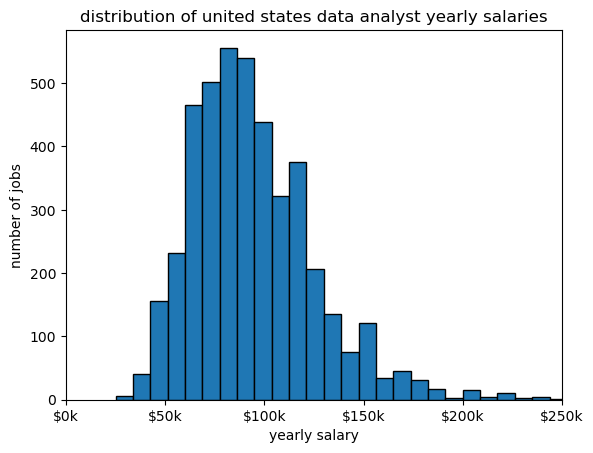

In [15]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40,edgecolor='black')
plt.xlim(0,250000)
# formating y axis
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}k'))
plt.title('distribution of united states data analyst yearly salaries')
plt.xlabel('yearly salary')
plt.ylabel('number of jobs')

## MATPLOTLIB BOX PLOTS

In [17]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [18]:
df_DA_US=df_DA_US.dropna(subset=['salary_year_avg'])

In [26]:
df_DA_US[['salary_year_avg']].sample(10)

,salary_year_avg
533644,122500.0
532217,160000.0
733155,78740.0
776063,82500.0
376253,188675.0
278108,125000.0
600728,83500.0
321868,135000.0
124537,115000.0
705362,157500.0


<Axes: >

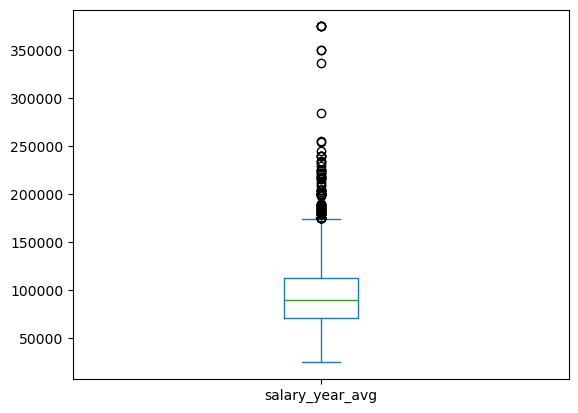

In [27]:
df_DA_US['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x2a9b2df39d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a9b2df8d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a9b2df2fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a9b2dfa190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a9b2dfa9d0>],
 'means': []}

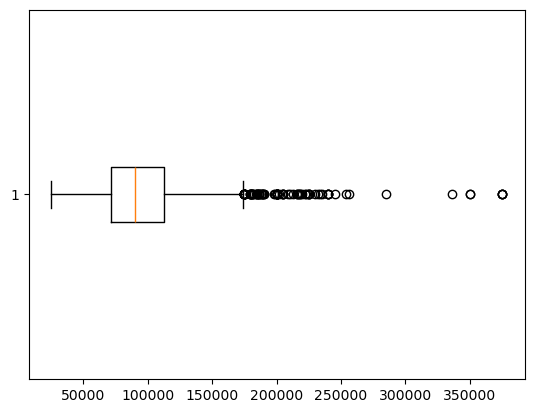

In [29]:
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)

C:\Users\Aadarsh Singh\AppData\Local\Temp\ipykernel_30072\2348035377.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles,vert=False)


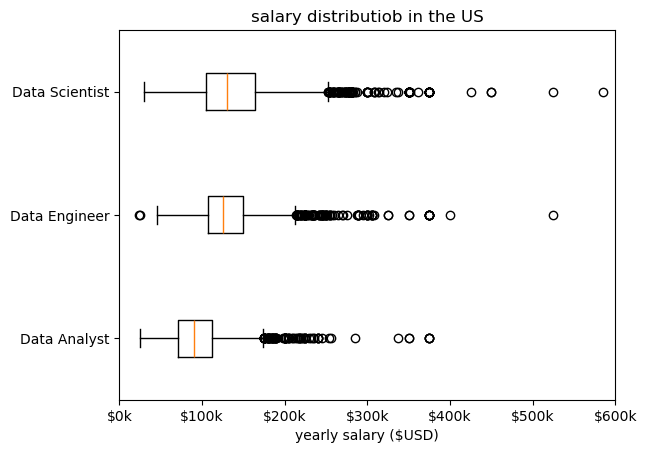

In [46]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()


df_US=df_US.dropna(subset=['salary_year_avg'])


job_list=[df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles,vert=False)

plt.title('salary distributiob in the US')
plt.xlabel('yearly salary ($USD)')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k' ))

# for filtering 0 to 600k
plt.xlim(0,600000)
plt.show()

In [ ]:
# df_US['job_title_short'].value_counts()

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64